In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


Bad key "text.kerning_factor" on line 4 in
/home/ml/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
# 현재경로 확인
os.getcwd()

'/home/ml/oneman/yongmin/ASAS_김용민/ASAS 반영용'

In [15]:
server = '192.168.212.242' 
database = 'MARTDB' 
username = 'dbadmin' 
password = '#mdbdpsnfl0816' 
conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password, autocommit = True)
cur = conn.cursor()

In [16]:
'''연령'''

start_vect=time.time()

##데이터 불러오기
query='''SET TRANSACTION ISOLATION LEVEL READ UNCOMMITTED     
         SELECT ITG_USER_ID,GENDER_CODE,age,[FILTER],SUM(AMT) OVER (PARTITION BY ITG_USER_ID ORDER BY ITG_USER_ID) AS AMT
         ,CASE WHEN [02]>0 THEN 1 ELSE 0 END AS [02]
,CASE WHEN [0201]>0 THEN 1 ELSE 0 END AS [0201]
,CASE WHEN [0203]>0 THEN 1 ELSE 0 END AS [0203]
,CASE WHEN [0204]>0 THEN 1 ELSE 0 END AS [0204]
,CASE WHEN [0208]>0 THEN 1 ELSE 0 END AS [0208]
,CASE WHEN [0211]>0 THEN 1 ELSE 0 END AS [0211]
,CASE WHEN [0215]>0 THEN 1 ELSE 0 END AS [0215]
,CASE WHEN [0220]>0 THEN 1 ELSE 0 END AS [0220]
,CASE WHEN [0224]>0 THEN 1 ELSE 0 END AS [0224]
,CASE WHEN [0232]>0 THEN 1 ELSE 0 END AS [0232]
,CASE WHEN [0233]>0 THEN 1 ELSE 0 END AS [0233]
,CASE WHEN [0234]>0 THEN 1 ELSE 0 END AS [0234]
,CASE WHEN [0235]>0 THEN 1 ELSE 0 END AS [0235]
,CASE WHEN [0236]>0 THEN 1 ELSE 0 END AS [0236]
,CASE WHEN [0237]>0 THEN 1 ELSE 0 END AS [0237]
,CASE WHEN [0238]>0 THEN 1 ELSE 0 END AS [0238]
,CASE WHEN [0239]>0 THEN 1 ELSE 0 END AS [0239]
,CASE WHEN [0240]>0 THEN 1 ELSE 0 END AS [0240]
,CASE WHEN [0241]>0 THEN 1 ELSE 0 END AS [0241]
,CASE WHEN [0283]>0 THEN 1 ELSE 0 END AS [0283]
,CASE WHEN [03  ]>0 THEN 1 ELSE 0 END AS [03  ]
,CASE WHEN [0304]>0 THEN 1 ELSE 0 END AS [0304]
,CASE WHEN [0305]>0 THEN 1 ELSE 0 END AS [0305]
,CASE WHEN [0308]>0 THEN 1 ELSE 0 END AS [0308]
,CASE WHEN [0318]>0 THEN 1 ELSE 0 END AS [0318]
,CASE WHEN [0357]>0 THEN 1 ELSE 0 END AS [0357]
,CASE WHEN [0359]>0 THEN 1 ELSE 0 END AS [0359]
,CASE WHEN [0360]>0 THEN 1 ELSE 0 END AS [0360]
,CASE WHEN [0362]>0 THEN 1 ELSE 0 END AS [0362]
,CASE WHEN [0363]>0 THEN 1 ELSE 0 END AS [0363]
,CASE WHEN [0364]>0 THEN 1 ELSE 0 END AS [0364]
,CASE WHEN [04  ]>0 THEN 1 ELSE 0 END AS [04  ]
,CASE WHEN [0401]>0 THEN 1 ELSE 0 END AS [0401]
,CASE WHEN [0402]>0 THEN 1 ELSE 0 END AS [0402]
,CASE WHEN [0404]>0 THEN 1 ELSE 0 END AS [0404]
,CASE WHEN [0405]>0 THEN 1 ELSE 0 END AS [0405]
,CASE WHEN [0408]>0 THEN 1 ELSE 0 END AS [0408]
,CASE WHEN [0414]>0 THEN 1 ELSE 0 END AS [0414]
,CASE WHEN [0418]>0 THEN 1 ELSE 0 END AS [0418]
,CASE WHEN [0420]>0 THEN 1 ELSE 0 END AS [0420]
,CASE WHEN [0421]>0 THEN 1 ELSE 0 END AS [0421]
,CASE WHEN [0422]>0 THEN 1 ELSE 0 END AS [0422]
,CASE WHEN [0423]>0 THEN 1 ELSE 0 END AS [0423]
,CASE WHEN [05  ]>0 THEN 1 ELSE 0 END AS [05  ]
,CASE WHEN [0502]>0 THEN 1 ELSE 0 END AS [0502]
,CASE WHEN [0503]>0 THEN 1 ELSE 0 END AS [0503]
,CASE WHEN [0507]>0 THEN 1 ELSE 0 END AS [0507]
,CASE WHEN [0508]>0 THEN 1 ELSE 0 END AS [0508]
,CASE WHEN [0510]>0 THEN 1 ELSE 0 END AS [0510]
,CASE WHEN [0511]>0 THEN 1 ELSE 0 END AS [0511]
,CASE WHEN [0513]>0 THEN 1 ELSE 0 END AS [0513]
,CASE WHEN [0514]>0 THEN 1 ELSE 0 END AS [0514]
,CASE WHEN [0515]>0 THEN 1 ELSE 0 END AS [0515]
,CASE WHEN [0521]>0 THEN 1 ELSE 0 END AS [0521]
,CASE WHEN [0526]>0 THEN 1 ELSE 0 END AS [0526]
,CASE WHEN [0527]>0 THEN 1 ELSE 0 END AS [0527]
,CASE WHEN [0550]>0 THEN 1 ELSE 0 END AS [0550]
,CASE WHEN [06  ]>0 THEN 1 ELSE 0 END AS [06  ]
,CASE WHEN [0601]>0 THEN 1 ELSE 0 END AS [0601]
,CASE WHEN [0602]>0 THEN 1 ELSE 0 END AS [0602]
,CASE WHEN [0603]>0 THEN 1 ELSE 0 END AS [0603]
,CASE WHEN [0605]>0 THEN 1 ELSE 0 END AS [0605]
,CASE WHEN [0606]>0 THEN 1 ELSE 0 END AS [0606]
,CASE WHEN [0607]>0 THEN 1 ELSE 0 END AS [0607]
,CASE WHEN [0608]>0 THEN 1 ELSE 0 END AS [0608]
,CASE WHEN [0609]>0 THEN 1 ELSE 0 END AS [0609]
,CASE WHEN [061 ]>0 THEN 1 ELSE 0 END AS [061 ]
,CASE WHEN [0610]>0 THEN 1 ELSE 0 END AS [0610]
,CASE WHEN [0611]>0 THEN 1 ELSE 0 END AS [0611]
,CASE WHEN [0621]>0 THEN 1 ELSE 0 END AS [0621]
,CASE WHEN [0690]>0 THEN 1 ELSE 0 END AS [0690]
,CASE WHEN [07  ]>0 THEN 1 ELSE 0 END AS [07  ]
,CASE WHEN [0701]>0 THEN 1 ELSE 0 END AS [0701]
,CASE WHEN [0702]>0 THEN 1 ELSE 0 END AS [0702]
,CASE WHEN [0703]>0 THEN 1 ELSE 0 END AS [0703]
,CASE WHEN [0704]>0 THEN 1 ELSE 0 END AS [0704]
,CASE WHEN [0705]>0 THEN 1 ELSE 0 END AS [0705]
,CASE WHEN [0707]>0 THEN 1 ELSE 0 END AS [0707]
,CASE WHEN [0708]>0 THEN 1 ELSE 0 END AS [0708]
,CASE WHEN [0709]>0 THEN 1 ELSE 0 END AS [0709]
,CASE WHEN [0710]>0 THEN 1 ELSE 0 END AS [0710]
,CASE WHEN [0711]>0 THEN 1 ELSE 0 END AS [0711]
,CASE WHEN [0712]>0 THEN 1 ELSE 0 END AS [0712]
,CASE WHEN [0713]>0 THEN 1 ELSE 0 END AS [0713]
,CASE WHEN [0715]>0 THEN 1 ELSE 0 END AS [0715]
,CASE WHEN [0717]>0 THEN 1 ELSE 0 END AS [0717]
,CASE WHEN [0718]>0 THEN 1 ELSE 0 END AS [0718]
,CASE WHEN [0719]>0 THEN 1 ELSE 0 END AS [0719]
,CASE WHEN [0720]>0 THEN 1 ELSE 0 END AS [0720]
,CASE WHEN [08  ]>0 THEN 1 ELSE 0 END AS [08  ]
,CASE WHEN [0801]>0 THEN 1 ELSE 0 END AS [0801]
,CASE WHEN [0802]>0 THEN 1 ELSE 0 END AS [0802]
,CASE WHEN [0803]>0 THEN 1 ELSE 0 END AS [0803]
,CASE WHEN [0804]>0 THEN 1 ELSE 0 END AS [0804]
,CASE WHEN [0805]>0 THEN 1 ELSE 0 END AS [0805]
,CASE WHEN [0806]>0 THEN 1 ELSE 0 END AS [0806]
,CASE WHEN [0807]>0 THEN 1 ELSE 0 END AS [0807]
,CASE WHEN [0808]>0 THEN 1 ELSE 0 END AS [0808]
,CASE WHEN [0809]>0 THEN 1 ELSE 0 END AS [0809]
,CASE WHEN [0810]>0 THEN 1 ELSE 0 END AS [0810]
,CASE WHEN [0812]>0 THEN 1 ELSE 0 END AS [0812]
,CASE WHEN [0813]>0 THEN 1 ELSE 0 END AS [0813]
,CASE WHEN [0814]>0 THEN 1 ELSE 0 END AS [0814]
,CASE WHEN [0860]>0 THEN 1 ELSE 0 END AS [0860]
,CASE WHEN [09  ]>0 THEN 1 ELSE 0 END AS [09  ]
,CASE WHEN [0901]>0 THEN 1 ELSE 0 END AS [0901]
,CASE WHEN [0902]>0 THEN 1 ELSE 0 END AS [0902]
,CASE WHEN [0903]>0 THEN 1 ELSE 0 END AS [0903]
,CASE WHEN [0904]>0 THEN 1 ELSE 0 END AS [0904]
,CASE WHEN [0905]>0 THEN 1 ELSE 0 END AS [0905]
,CASE WHEN [0906]>0 THEN 1 ELSE 0 END AS [0906]
,CASE WHEN [0907]>0 THEN 1 ELSE 0 END AS [0907]
,CASE WHEN [0908]>0 THEN 1 ELSE 0 END AS [0908]
,CASE WHEN [0909]>0 THEN 1 ELSE 0 END AS [0909]
,CASE WHEN [0911]>0 THEN 1 ELSE 0 END AS [0911]
,CASE WHEN [0912]>0 THEN 1 ELSE 0 END AS [0912]
,CASE WHEN [0913]>0 THEN 1 ELSE 0 END AS [0913]
,CASE WHEN [0915]>0 THEN 1 ELSE 0 END AS [0915]
,CASE WHEN [0918]>0 THEN 1 ELSE 0 END AS [0918]
,CASE WHEN [0919]>0 THEN 1 ELSE 0 END AS [0919]
,CASE WHEN [0920]>0 THEN 1 ELSE 0 END AS [0920]
,CASE WHEN [0921]>0 THEN 1 ELSE 0 END AS [0921]
,CASE WHEN [0923]>0 THEN 1 ELSE 0 END AS [0923]
,CASE WHEN [0924]>0 THEN 1 ELSE 0 END AS [0924]
,CASE WHEN [0925]>0 THEN 1 ELSE 0 END AS [0925]
,CASE WHEN [0929]>0 THEN 1 ELSE 0 END AS [0929]
,CASE WHEN [0930]>0 THEN 1 ELSE 0 END AS [0930]
,CASE WHEN [0931]>0 THEN 1 ELSE 0 END AS [0931]
,CASE WHEN [0937]>0 THEN 1 ELSE 0 END AS [0937]
,CASE WHEN [0941]>0 THEN 1 ELSE 0 END AS [0941]
,CASE WHEN [10  ]>0 THEN 1 ELSE 0 END AS [10  ]
,CASE WHEN [1000]>0 THEN 1 ELSE 0 END AS [1000]
,CASE WHEN [1001]>0 THEN 1 ELSE 0 END AS [1001]
,CASE WHEN [1002]>0 THEN 1 ELSE 0 END AS [1002]
,CASE WHEN [1003]>0 THEN 1 ELSE 0 END AS [1003]
,CASE WHEN [1004]>0 THEN 1 ELSE 0 END AS [1004]
,CASE WHEN [1005]>0 THEN 1 ELSE 0 END AS [1005]
,CASE WHEN [1007]>0 THEN 1 ELSE 0 END AS [1007]
,CASE WHEN [1009]>0 THEN 1 ELSE 0 END AS [1009]
,CASE WHEN [1010]>0 THEN 1 ELSE 0 END AS [1010]
,CASE WHEN [1011]>0 THEN 1 ELSE 0 END AS [1011]
,CASE WHEN [1012]>0 THEN 1 ELSE 0 END AS [1012]
,CASE WHEN [1013]>0 THEN 1 ELSE 0 END AS [1013]
,CASE WHEN [1014]>0 THEN 1 ELSE 0 END AS [1014]
,CASE WHEN [1015]>0 THEN 1 ELSE 0 END AS [1015]
,CASE WHEN [1020]>0 THEN 1 ELSE 0 END AS [1020]
,CASE WHEN [1023]>0 THEN 1 ELSE 0 END AS [1023]
,CASE WHEN [1024]>0 THEN 1 ELSE 0 END AS [1024]
,CASE WHEN [12  ]>0 THEN 1 ELSE 0 END AS [12  ]
,CASE WHEN [1201]>0 THEN 1 ELSE 0 END AS [1201]
,CASE WHEN [1202]>0 THEN 1 ELSE 0 END AS [1202]
,CASE WHEN [1203]>0 THEN 1 ELSE 0 END AS [1203]
,CASE WHEN [1204]>0 THEN 1 ELSE 0 END AS [1204]
,CASE WHEN [1205]>0 THEN 1 ELSE 0 END AS [1205]
,CASE WHEN [1207]>0 THEN 1 ELSE 0 END AS [1207]
,CASE WHEN [1208]>0 THEN 1 ELSE 0 END AS [1208]
,CASE WHEN [1209]>0 THEN 1 ELSE 0 END AS [1209]
,CASE WHEN [1213]>0 THEN 1 ELSE 0 END AS [1213]
,CASE WHEN [1215]>0 THEN 1 ELSE 0 END AS [1215]
,CASE WHEN [1219]>0 THEN 1 ELSE 0 END AS [1219]
,CASE WHEN [1226]>0 THEN 1 ELSE 0 END AS [1226]
,CASE WHEN [1227]>0 THEN 1 ELSE 0 END AS [1227]
,CASE WHEN [1228]>0 THEN 1 ELSE 0 END AS [1228]
,CASE WHEN [1242]>0 THEN 1 ELSE 0 END AS [1242]
,CASE WHEN [1244]>0 THEN 1 ELSE 0 END AS [1244]
,CASE WHEN [1245]>0 THEN 1 ELSE 0 END AS [1245]
,CASE WHEN [1254]>0 THEN 1 ELSE 0 END AS [1254]
,CASE WHEN [14  ]>0 THEN 1 ELSE 0 END AS [14  ]
,CASE WHEN [1434]>0 THEN 1 ELSE 0 END AS [1434]
,CASE WHEN [1435]>0 THEN 1 ELSE 0 END AS [1435]
,CASE WHEN [1436]>0 THEN 1 ELSE 0 END AS [1436]
,CASE WHEN [1437]>0 THEN 1 ELSE 0 END AS [1437]
,CASE WHEN [1451]>0 THEN 1 ELSE 0 END AS [1451]
,CASE WHEN [1452]>0 THEN 1 ELSE 0 END AS [1452]
,CASE WHEN [1454]>0 THEN 1 ELSE 0 END AS [1454]
,CASE WHEN [1455]>0 THEN 1 ELSE 0 END AS [1455]
,CASE WHEN [1456]>0 THEN 1 ELSE 0 END AS [1456]
,CASE WHEN [1457]>0 THEN 1 ELSE 0 END AS [1457]
,CASE WHEN [1459]>0 THEN 1 ELSE 0 END AS [1459]
,CASE WHEN [1469]>0 THEN 1 ELSE 0 END AS [1469]
,CASE WHEN [15  ]>0 THEN 1 ELSE 0 END AS [15  ]
,CASE WHEN [1501]>0 THEN 1 ELSE 0 END AS [1501]
,CASE WHEN [1502]>0 THEN 1 ELSE 0 END AS [1502]
,CASE WHEN [1503]>0 THEN 1 ELSE 0 END AS [1503]
,CASE WHEN [1504]>0 THEN 1 ELSE 0 END AS [1504]
,CASE WHEN [1505]>0 THEN 1 ELSE 0 END AS [1505]
,CASE WHEN [1507]>0 THEN 1 ELSE 0 END AS [1507]
,CASE WHEN [1508]>0 THEN 1 ELSE 0 END AS [1508]
,CASE WHEN [1511]>0 THEN 1 ELSE 0 END AS [1511]
,CASE WHEN [1513]>0 THEN 1 ELSE 0 END AS [1513]
,CASE WHEN [16]>0 THEN 1 ELSE 0 END AS [16]
,CASE WHEN [1600]>0 THEN 1 ELSE 0 END AS [1600]
,CASE WHEN [1601]>0 THEN 1 ELSE 0 END AS [1601]
,CASE WHEN [1602]>0 THEN 1 ELSE 0 END AS [1602]
,CASE WHEN [1603]>0 THEN 1 ELSE 0 END AS [1603]
,CASE WHEN [1605]>0 THEN 1 ELSE 0 END AS [1605]
,CASE WHEN [1609]>0 THEN 1 ELSE 0 END AS [1609]
,CASE WHEN [1611]>0 THEN 1 ELSE 0 END AS [1611]
,CASE WHEN [1614]>0 THEN 1 ELSE 0 END AS [1614]
,CASE WHEN [1619]>0 THEN 1 ELSE 0 END AS [1619]
,CASE WHEN [1620]>0 THEN 1 ELSE 0 END AS [1620]
,CASE WHEN [1621]>0 THEN 1 ELSE 0 END AS [1621]
,CASE WHEN [1623]>0 THEN 1 ELSE 0 END AS [1623]
,CASE WHEN [1625]>0 THEN 1 ELSE 0 END AS [1625]
,CASE WHEN [1626]>0 THEN 1 ELSE 0 END AS [1626]
,CASE WHEN [1629]>0 THEN 1 ELSE 0 END AS [1629]
,CASE WHEN [1632]>0 THEN 1 ELSE 0 END AS [1632]
,CASE WHEN [1634]>0 THEN 1 ELSE 0 END AS [1634]
,CASE WHEN [1635]>0 THEN 1 ELSE 0 END AS [1635]
,CASE WHEN [1636]>0 THEN 1 ELSE 0 END AS [1636]
,CASE WHEN [1640]>0 THEN 1 ELSE 0 END AS [1640]
,CASE WHEN [1642]>0 THEN 1 ELSE 0 END AS [1642]
,CASE WHEN [1643]>0 THEN 1 ELSE 0 END AS [1643]
,CASE WHEN [1644]>0 THEN 1 ELSE 0 END AS [1644]
,CASE WHEN [1645]>0 THEN 1 ELSE 0 END AS [1645]
,CASE WHEN [1646]>0 THEN 1 ELSE 0 END AS [1646]
,CASE WHEN [1647]>0 THEN 1 ELSE 0 END AS [1647]
,CASE WHEN [1652]>0 THEN 1 ELSE 0 END AS [1652]
,CASE WHEN [1654]>0 THEN 1 ELSE 0 END AS [1654]
,CASE WHEN [1655]>0 THEN 1 ELSE 0 END AS [1655]
,CASE WHEN [1685]>0 THEN 1 ELSE 0 END AS [1685]
,CASE WHEN [18  ]>0 THEN 1 ELSE 0 END AS [18  ]
,CASE WHEN [1801]>0 THEN 1 ELSE 0 END AS [1801]
,CASE WHEN [1802]>0 THEN 1 ELSE 0 END AS [1802]
,CASE WHEN [1803]>0 THEN 1 ELSE 0 END AS [1803]
,CASE WHEN [1807]>0 THEN 1 ELSE 0 END AS [1807]
,CASE WHEN [1822]>0 THEN 1 ELSE 0 END AS [1822]
,CASE WHEN [1891]>0 THEN 1 ELSE 0 END AS [1891]
,CASE WHEN [2018]>0 THEN 1 ELSE 0 END AS [2018]
,CASE WHEN [21]>0 THEN 1 ELSE 0 END AS [21]
,CASE WHEN [2103]>0 THEN 1 ELSE 0 END AS [2103]
,CASE WHEN [2104]>0 THEN 1 ELSE 0 END AS [2104]
,CASE WHEN [2105]>0 THEN 1 ELSE 0 END AS [2105]
,CASE WHEN [2106]>0 THEN 1 ELSE 0 END AS [2106]
,CASE WHEN [2108]>0 THEN 1 ELSE 0 END AS [2108]
,CASE WHEN [2109]>0 THEN 1 ELSE 0 END AS [2109]
,CASE WHEN [211 ]>0 THEN 1 ELSE 0 END AS [211 ]
,CASE WHEN [2114]>0 THEN 1 ELSE 0 END AS [2114]
,CASE WHEN [2115]>0 THEN 1 ELSE 0 END AS [2115]
,CASE WHEN [2122]>0 THEN 1 ELSE 0 END AS [2122]
,CASE WHEN [2131]>0 THEN 1 ELSE 0 END AS [2131]
,CASE WHEN [2144]>0 THEN 1 ELSE 0 END AS [2144]
,CASE WHEN [2145]>0 THEN 1 ELSE 0 END AS [2145]
,CASE WHEN [2163]>0 THEN 1 ELSE 0 END AS [2163]
,CASE WHEN [2177]>0 THEN 1 ELSE 0 END AS [2177]
,CASE WHEN [22  ]>0 THEN 1 ELSE 0 END AS [22  ]
,CASE WHEN [2211]>0 THEN 1 ELSE 0 END AS [2211]
,CASE WHEN [2241]>0 THEN 1 ELSE 0 END AS [2241]
,CASE WHEN [2324]>0 THEN 1 ELSE 0 END AS [2324]
,CASE WHEN [24]>0 THEN 1 ELSE 0 END AS [24]
,CASE WHEN [2401]>0 THEN 1 ELSE 0 END AS [2401]
,CASE WHEN [2402]>0 THEN 1 ELSE 0 END AS [2402]
,CASE WHEN [2403]>0 THEN 1 ELSE 0 END AS [2403]
,CASE WHEN [2404]>0 THEN 1 ELSE 0 END AS [2404]
,CASE WHEN [2405]>0 THEN 1 ELSE 0 END AS [2405]
,CASE WHEN [2406]>0 THEN 1 ELSE 0 END AS [2406]
,CASE WHEN [2407]>0 THEN 1 ELSE 0 END AS [2407]
,CASE WHEN [241 ]>0 THEN 1 ELSE 0 END AS [241 ]
,CASE WHEN [3175]>0 THEN 1 ELSE 0 END AS [3175]
,CASE WHEN [4454]>0 THEN 1 ELSE 0 END AS [4454]
,CASE WHEN [6006]>0 THEN 1 ELSE 0 END AS [6006]
,CASE WHEN [91  ]>0 THEN 1 ELSE 0 END AS [91  ]
,CASE WHEN [9101]>0 THEN 1 ELSE 0 END AS [9101]
,CASE WHEN [93  ]>0 THEN 1 ELSE 0 END AS [93  ]
,CASE WHEN [9300]>0 THEN 1 ELSE 0 END AS [9300]
,CASE WHEN [9301]>0 THEN 1 ELSE 0 END AS [9301]
,CASE WHEN [9303]>0 THEN 1 ELSE 0 END AS [9303]
,CASE WHEN [9304]>0 THEN 1 ELSE 0 END AS [9304]
,CASE WHEN [9305]>0 THEN 1 ELSE 0 END AS [9305]
,CASE WHEN [9306]>0 THEN 1 ELSE 0 END AS [9306]
,CASE WHEN [9307]>0 THEN 1 ELSE 0 END AS [9307]
,CASE WHEN [9308]>0 THEN 1 ELSE 0 END AS [9308]
,CASE WHEN [9309]>0 THEN 1 ELSE 0 END AS [9309]
,CASE WHEN [9310]>0 THEN 1 ELSE 0 END AS [9310]
,CASE WHEN [95]>0 THEN 1 ELSE 0 END AS [95]
,CASE WHEN [9501]>0 THEN 1 ELSE 0 END AS [9501]
,CASE WHEN [9999]>0 THEN 1 ELSE 0 END AS [9999]
--,dense_rank() over(partition by ''order by  birth_year )-1 as BIRTH_LABEL
from(select *
	FROM	(SELECT  a.ITG_USER_ID,LEFT(ENR_CATE_CODE,4) AS MCATE,CASE WHEN GENDER_CODE = 'M' THEN 0
                    ELSE  1 END AS GENDER_CODE
                  , case when 2021 - convert(int,birth_year)<20 then 0
                         when 2021 - convert(int,birth_year)<30 then 1
                         when 2021 - convert(int,birth_year)<40 then 2
                         when 2021 - convert(int,birth_year)<50 then 3
                         when 2021 - convert(int,birth_year)<60 then 4
                         else 5 end as age
                  ,count(*) as cnt
                   ,SUM(CASE WHEN COUNT(*) > 0 THEN 1 
					  WHEN COUNT(*) IS NULL THEN 0
                     
				ELSE 0 END) OVER (PARTITION BY a.ITG_USER_ID) AS FILTER
                ,sum(drm_pay_amt) as AMT
			FROM ml_buy_trn AS A WITH(NOLOCK) 
            inner join MIDW.DBO.ITG_USER_DEMO_BSC as b WITH(NOLOCK) 
            on a.itg_user_id =b.itg_user_id 
           where CERTIFY_YN <> 'N' and  ENR_CATE_CODE not in ('00','','_','00000000') AND BUY_DATE BETWEEN '20200101' AND  '20201215'
           and itg_buy_no not in (select itg_buy_no from ml_buy_trn with(nolock) where BUY_STATE_CODE = 4 and DRM_PAY_AMT >1000000 AND BUY_DATE BETWEEN '20190101' AND  '20201031')
			GROUP BY a.ITG_USER_ID,LEFT(ENR_CATE_CODE,4) ,CASE WHEN GENDER_CODE = 'M' THEN 0
                    ELSE  1 END,case when 2021 - convert(int,birth_year)<20 then 0
                                     when 2021 - convert(int,birth_year)<30 then 1
                                     when 2021 - convert(int,birth_year)<40 then 2
                                     when 2021 - convert(int,birth_year)<50 then 3
                                     when 2021 - convert(int,birth_year)<60 then 4
                                     else 5 end
			) AS H
			PIVOT  (MAX(cnt)
					FOR MCATE IN ( [02],	[0201],	[0203],	[0204],	[0208],	[0211],	[0215],	[0220],	[0224],	[0232],	[0233],	[0234],	[0235],	[0236],	[0237],	[0238],	[0239],	[0240],	[0241],	[0283],	[03  ],	[0304],	[0305],	[0308],	[0318],	[0357],	[0359],	[0360],	[0362],	[0363],	[0364],	[04  ],	[0401],	[0402],	[0404],	[0405],	[0408],	[0414],	[0418],	[0420],	[0421],	[0422],	[0423],	[05  ],	[0502],	[0503],	[0507],	[0508],	[0510],	[0511],	[0513],	[0514],	[0515],	[0521],	[0526],	[0527],	[0550],	[06  ],	[0601],	[0602],	[0603],	[0605],	[0606],	[0607],	[0608],	[0609],	[061 ],	[0610],	[0611],	[0621],	[0690],	[07  ],	[0701],	[0702],	[0703],	[0704],	[0705],	[0707],	[0708],	[0709],	[0710],	[0711],	[0712],	[0713],	[0715],	[0717],	[0718],	[0719],	[0720],	[08  ],	[0801],	[0802],	[0803],	[0804],	[0805],	[0806],	[0807],	[0808],	[0809],	[0810],	[0812],	[0813],	[0814],	[0860],	[09  ],	[0901],	[0902],	[0903],	[0904],	[0905],	[0906],	[0907],	[0908],	[0909],	[0911],	[0912],	[0913],	[0915],	[0918],	[0919],	[0920],	[0921],	[0923],	[0924],	[0925],	[0929],	[0930],	[0931],	[0937],	[0941],	[10  ],	[1000],	[1001],	[1002],	[1003],	[1004],	[1005],	[1007],	[1009],	[1010],	[1011],	[1012],	[1013],	[1014],	[1015],	[1020],	[1023],	[1024],	[12  ],	[1201],	[1202],	[1203],	[1204],	[1205],	[1207],	[1208],	[1209],	[1213],	[1215],	[1219],	[1226],	[1227],	[1228],	[1242],	[1244],	[1245],	[1254],	[14  ],	[1434],	[1435],	[1436],	[1437],	[1451],	[1452],	[1454],	[1455],	[1456],	[1457],	[1459],	[1469],	[15  ],	[1501],	[1502],	[1503],	[1504],	[1505],	[1507],	[1508],	[1511],	[1513],	[16],	[1600],	[1601],	[1602],	[1603],	[1605],	[1609],	[1611],	[1614],	[1619],	[1620],	[1621],	[1623],	[1625],	[1626],	[1629],	[1632],	[1634],	[1635],	[1636],	[1640],	[1642],	[1643],	[1644],	[1645],	[1646],	[1647],	[1652],	[1654],	[1655],	[1685],	[18  ],	[1801],	[1802],	[1803],	[1807],	[1822],	[1891],	[2018],	[21],	[2103],	[2104],	[2105],	[2106],	[2108],	[2109],	[211 ],	[2114],	[2115],	[2122],	[2131],	[2144],	[2145],	[2163],	[2177],	[22  ],	[2211],	[2241],	[2324],	[24],	[2401],	[2402],	[2403],	[2404],	[2405],	[2406],	[2407],	[241 ],	[3175],	[4454],	[6006],	[91  ],	[9101],	[93  ],	[9300],	[9301],	[9303],	[9304],	[9305],	[9306],	[9307],	[9308],	[9309],	[9310],	[95],	[9501],	[9999]
)   
					) AS PVT
				) as HH
WHERE FILTER >=2
OPTION (MAXDOP 3)'''
data=pd.read_sql(query,conn)
print("Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

conn.close()

Runtime: 18.78 Minutes


In [19]:
nCar = data.shape[0] # 데이터 개수
nVar = data.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 3856203 nVar: 282


In [20]:
data

,ITG_USER_ID,GENDER_CODE,age,FILTER,AMT,02,0201,0203,0204,0208,...,9304,9305,9306,9307,9308,9309,9310,95,9501,9999
0,5,1,3,30,1073367.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,3,30,1073367.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,3,30,1073367.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,3,30,1073367.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,3,30,1073367.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856198,3127538,0,2,16,272178.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3856199,3127538,0,2,16,272178.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3856200,3127538,0,2,16,272178.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3856201,3127538,0,2,16,272178.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#RANK 함수
def transpct(data,group_feature,feature):
    return data.groupby(group_feature)[feature].rank(ascending=False,method="max",pct=True)
def transrank(data,group_feature,feature):
    return data.groupby(group_feature)[feature].rank(ascending=False, method="max")

In [22]:
#RANKpct 적용
group_brand['BRAND_CNTpct']=transpct(group_brand,'BRAND_NAME','BRAND_CNT')
group_brand['BRAND_PAYpct']=transpct(group_brand,'BRAND_NAME','PAY')
group_maker['MAKER_CNTpct']=transpct(group_maker,'MAKER_NAME','MAKER_CNT')
group_maker['MAKER_PAYpct']=transpct(group_maker,'MAKER_NAME','PAY')

NameError: name 'group_brand' is not defined

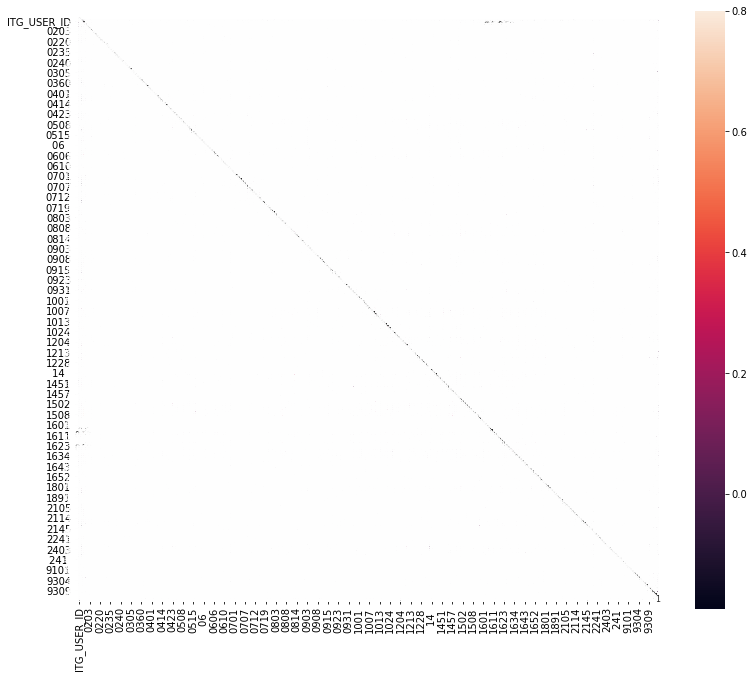

In [9]:
# #변수간 상관관계 있는지 여부 확인
# corrmat=data.corr()
# plt.subplots(figsize=(13,11))
# sns.heatmap(corrmat,vmax=0.8, square=True, annot=True, annot_kws={'size':8})
# plt.show()

In [ ]:
# random_index=np.random.choice(data.reset_index(drop=False,inplace=False)['index'],size=1500000)

In [ ]:
# random_index

In [ ]:
# random_index=pd.DataFrame([random_index]).T
# random_index= random_index.rename(columns={0:"index"})

In [ ]:
random_index

## 의미가 없다고 판단되는 변수 제거

In [ ]:
# data = data.reset_index()

In [16]:
# data[['BIRTH_YEAR']] = data[['BIRTH_YEAR']].apply(pd.to_numeric)


In [9]:
data = data.drop(['ITG_USER_ID'], axis = 1) # id 제거

In [16]:
# data = data.drop(['FILTER'], axis = 1) # id 제거

In [ ]:
# data = data.drop(['MCATE'], axis = 1) # id 제거

In [ ]:
# data = data.drop(['QNTY'], axis = 1) # id 제거

In [ ]:
# data = data.drop(['index'], axis = 1) # id 제거

In [ ]:
data.info()

In [6]:
data

,ITG_USER_ID,GENDER_CODE,age,FILTER,02,0201,0203,0204,0208,0211,...,9304,9305,9306,9307,9308,9309,9310,95,9501,9999
0,61,0,2,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,117,0,1,45,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,158,0,2,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,161,0,3,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,1,3,44,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196309,3118546,1,3,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196310,3118553,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196311,3118565,0,3,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196312,3118580,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
min(data['age'])

0

In [8]:
max(data['age'])

5

In [9]:
max(data['age'])

5

In [10]:
min(data['age'])

0

In [ ]:
# random_extract= pd.merge(random_index, data, on='index', how='inner')

## 설명변수 및 타겟변수 숫자로 변환

In [ ]:
# random_extract

In [ ]:
# data=data.apply(pd.to_numeric, errors = 'coerce') 

In [ ]:
# random_extract.info()

In [ ]:
# data.isnull().values.any()

In [ ]:
# data=random_extract.fillna(0)

In [ ]:
# data = data.drop(['index'], axis = 1) # id 제거

## 설명변수와 타겟변수를 분리, 학습데이터와 평가데이터 분리

In [23]:
feature_columns = list(data.columns.difference(['age'])) # target을 제외한 모든 행
X = data[feature_columns] # 설명변수
y = data['age'] # 타겟변수
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할| 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(3084962, 281) (771241, 281) (3084962,) (771241,)


## 1. XGBoost

In [13]:
# !pip install xgboost
import xgboost as xgb
import time
start = time.time() # 시작 시간 지정
xgb_dtrain = xgb.DMatrix(data = train_x, label = train_y) # 학습 데이터를 XGBoost 모델에 맞게 변환
xgb_dtest = xgb.DMatrix(data = test_x) # 평가 데이터를 XGBoost 모델에 맞게 변환
xgb_param = {'max_depth': 100, # 트리 깊이
         'learning_rate': 0.01, # Step Size
         'n_estimators': 100, # Number of trees, 트리 생성 개수
         'objective': 'multi:softmax', # 목적 함수
        'num_class': len(set(train_y)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain) # 학습 진행
xgb_model_predict = xgb_model.predict(xgb_dtest) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(test_y, xgb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[14:36:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy: 41.73 %
Time: 115.56 seconds


In [14]:
xgb_model_predict

array([4., 2., 2., ..., 3., 2., 3.], dtype=float32)

## 2. LightGBM

In [24]:
# !pip install lightgbm
import lightgbm as lgb
start = time.time() # 시작 시간 지정
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 100, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees, 트리 생성 개수
             'objective' : 'binary',
#              'boosting' : 'rf', #gdbt,rf,dart,goss
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(train_y)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = np.argmax(lgb_model.predict(test_x), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
print("Accuracy: %.2f" % (accuracy_score(test_y, lgb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

/home/ml/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Accuracy: 45.94 %
Time: 810.68 seconds


In [15]:
lgb_model.predict(test_x)

array([[6.13292146e-01, 3.86707854e-01, 9.87287286e-16],
       [6.94385288e-01, 3.05614712e-01, 9.33911515e-16],
       [6.33740765e-01, 3.66259235e-01, 9.76716356e-16],
       ...,
       [5.01846293e-01, 4.98153707e-01, 1.01364385e-15],
       [2.82890356e-01, 7.17109644e-01, 9.13103903e-16],
       [6.08415788e-01, 3.91584212e-01, 9.89535025e-16]])

In [16]:
# !pip install catboost
import catboost as cb
start = time.time() # 시작 시간 지정
cb_dtrain = cb.Pool(data = train_x, label = train_y) # 학습 데이터를 Catboost 모델에 맞게 변환
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 100, # Number of trees, 트리 생성 개수
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'MultiClass'} # 손실 함수, 목적 함수
cb_model = cb.train(pool = cb_dtrain, params = cb_param) # 학습 진행
cb_model_predict = np.argmax(cb_model.predict(test_x), axis = 1) + 1 # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1
print("Accuracy: %.2f" % (accuracy_score(test_y, cb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

0:	learn: 0.4218566	total: 481ms	remaining: 47.6s
1:	learn: 0.4320253	total: 881ms	remaining: 43.2s
2:	learn: 0.4437412	total: 1.28s	remaining: 41.4s
3:	learn: 0.4445308	total: 1.68s	remaining: 40.2s
4:	learn: 0.4426014	total: 2.06s	remaining: 39.2s
5:	learn: 0.4426078	total: 2.48s	remaining: 38.9s
6:	learn: 0.4426651	total: 2.89s	remaining: 38.4s
7:	learn: 0.4433273	total: 3.32s	remaining: 38.1s
8:	learn: 0.4448364	total: 3.75s	remaining: 38s
9:	learn: 0.4444416	total: 4.17s	remaining: 37.5s
10:	learn: 0.4441742	total: 4.58s	remaining: 37s
11:	learn: 0.4447663	total: 4.98s	remaining: 36.5s
12:	learn: 0.4445626	total: 5.41s	remaining: 36.2s
13:	learn: 0.4459507	total: 5.81s	remaining: 35.7s
14:	learn: 0.4470650	total: 6.23s	remaining: 35.3s
15:	learn: 0.4482620	total: 6.65s	remaining: 34.9s
16:	learn: 0.4487205	total: 7.07s	remaining: 34.5s
17:	learn: 0.4487332	total: 7.49s	remaining: 34.1s
18:	learn: 0.4495864	total: 7.89s	remaining: 33.6s
19:	learn: 0.4493317	total: 8.3s	remaining: 3

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

/home/ml/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## RandomForest

## 그렇다면, 트리의 깊이를 최대로 늘려보자!

In [19]:
start = time.time() # 시작 시간 지정
random_forest_model4 = RandomForestClassifier(n_estimators = 300, # 300번 추정
                                             max_depth = 100, # 트리 최대 깊이 100
                                             random_state = 42) # 시드값 고정
model4 = random_forest_model4.fit(train_x, train_y) # 학습 진행
predict4 = model4.predict(test_x) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(test_y, predict4) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

Accuracy: 46.70 %
Time: 171.37 seconds


In [25]:
predict4

array([0, 0, 0, ..., 0, 1, 0])

# 예측데이터셋 불러오기

In [36]:
server = '192.168.212.242' 
database = 'MARTDB' 
username = 'dbadmin' 
password = '#mdbdpsnfl0816' 
conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password, autocommit = True)
cur = conn.cursor()

In [37]:
start_vect=time.time()

##데이터 불러오기
query='''SET TRANSACTION ISOLATION LEVEL READ UNCOMMITTED     
         SELECT ITG_USER_ID,GENDER_CODE
         ,[FILTER],CASE WHEN [02]>0 THEN 1 ELSE 0 END AS [02]
,CASE WHEN [0201]>0 THEN 1 ELSE 0 END AS [0201]
,CASE WHEN [0203]>0 THEN 1 ELSE 0 END AS [0203]
,CASE WHEN [0204]>0 THEN 1 ELSE 0 END AS [0204]
,CASE WHEN [0208]>0 THEN 1 ELSE 0 END AS [0208]
,CASE WHEN [0211]>0 THEN 1 ELSE 0 END AS [0211]
,CASE WHEN [0215]>0 THEN 1 ELSE 0 END AS [0215]
,CASE WHEN [0220]>0 THEN 1 ELSE 0 END AS [0220]
,CASE WHEN [0224]>0 THEN 1 ELSE 0 END AS [0224]
,CASE WHEN [0232]>0 THEN 1 ELSE 0 END AS [0232]
,CASE WHEN [0233]>0 THEN 1 ELSE 0 END AS [0233]
,CASE WHEN [0234]>0 THEN 1 ELSE 0 END AS [0234]
,CASE WHEN [0235]>0 THEN 1 ELSE 0 END AS [0235]
,CASE WHEN [0236]>0 THEN 1 ELSE 0 END AS [0236]
,CASE WHEN [0237]>0 THEN 1 ELSE 0 END AS [0237]
,CASE WHEN [0238]>0 THEN 1 ELSE 0 END AS [0238]
,CASE WHEN [0239]>0 THEN 1 ELSE 0 END AS [0239]
,CASE WHEN [0240]>0 THEN 1 ELSE 0 END AS [0240]
,CASE WHEN [0241]>0 THEN 1 ELSE 0 END AS [0241]
,CASE WHEN [0283]>0 THEN 1 ELSE 0 END AS [0283]
,CASE WHEN [03  ]>0 THEN 1 ELSE 0 END AS [03  ]
,CASE WHEN [0304]>0 THEN 1 ELSE 0 END AS [0304]
,CASE WHEN [0305]>0 THEN 1 ELSE 0 END AS [0305]
,CASE WHEN [0308]>0 THEN 1 ELSE 0 END AS [0308]
,CASE WHEN [0318]>0 THEN 1 ELSE 0 END AS [0318]
,CASE WHEN [0357]>0 THEN 1 ELSE 0 END AS [0357]
,CASE WHEN [0359]>0 THEN 1 ELSE 0 END AS [0359]
,CASE WHEN [0360]>0 THEN 1 ELSE 0 END AS [0360]
,CASE WHEN [0362]>0 THEN 1 ELSE 0 END AS [0362]
,CASE WHEN [0363]>0 THEN 1 ELSE 0 END AS [0363]
,CASE WHEN [0364]>0 THEN 1 ELSE 0 END AS [0364]
,CASE WHEN [04  ]>0 THEN 1 ELSE 0 END AS [04  ]
,CASE WHEN [0401]>0 THEN 1 ELSE 0 END AS [0401]
,CASE WHEN [0402]>0 THEN 1 ELSE 0 END AS [0402]
,CASE WHEN [0404]>0 THEN 1 ELSE 0 END AS [0404]
,CASE WHEN [0405]>0 THEN 1 ELSE 0 END AS [0405]
,CASE WHEN [0408]>0 THEN 1 ELSE 0 END AS [0408]
,CASE WHEN [0414]>0 THEN 1 ELSE 0 END AS [0414]
,CASE WHEN [0418]>0 THEN 1 ELSE 0 END AS [0418]
,CASE WHEN [0420]>0 THEN 1 ELSE 0 END AS [0420]
,CASE WHEN [0421]>0 THEN 1 ELSE 0 END AS [0421]
,CASE WHEN [0422]>0 THEN 1 ELSE 0 END AS [0422]
,CASE WHEN [0423]>0 THEN 1 ELSE 0 END AS [0423]
,CASE WHEN [05  ]>0 THEN 1 ELSE 0 END AS [05  ]
,CASE WHEN [0502]>0 THEN 1 ELSE 0 END AS [0502]
,CASE WHEN [0503]>0 THEN 1 ELSE 0 END AS [0503]
,CASE WHEN [0507]>0 THEN 1 ELSE 0 END AS [0507]
,CASE WHEN [0508]>0 THEN 1 ELSE 0 END AS [0508]
,CASE WHEN [0510]>0 THEN 1 ELSE 0 END AS [0510]
,CASE WHEN [0511]>0 THEN 1 ELSE 0 END AS [0511]
,CASE WHEN [0513]>0 THEN 1 ELSE 0 END AS [0513]
,CASE WHEN [0514]>0 THEN 1 ELSE 0 END AS [0514]
,CASE WHEN [0515]>0 THEN 1 ELSE 0 END AS [0515]
,CASE WHEN [0521]>0 THEN 1 ELSE 0 END AS [0521]
,CASE WHEN [0526]>0 THEN 1 ELSE 0 END AS [0526]
,CASE WHEN [0527]>0 THEN 1 ELSE 0 END AS [0527]
,CASE WHEN [0550]>0 THEN 1 ELSE 0 END AS [0550]
,CASE WHEN [06  ]>0 THEN 1 ELSE 0 END AS [06  ]
,CASE WHEN [0601]>0 THEN 1 ELSE 0 END AS [0601]
,CASE WHEN [0602]>0 THEN 1 ELSE 0 END AS [0602]
,CASE WHEN [0603]>0 THEN 1 ELSE 0 END AS [0603]
,CASE WHEN [0605]>0 THEN 1 ELSE 0 END AS [0605]
,CASE WHEN [0606]>0 THEN 1 ELSE 0 END AS [0606]
,CASE WHEN [0607]>0 THEN 1 ELSE 0 END AS [0607]
,CASE WHEN [0608]>0 THEN 1 ELSE 0 END AS [0608]
,CASE WHEN [0609]>0 THEN 1 ELSE 0 END AS [0609]
,CASE WHEN [061 ]>0 THEN 1 ELSE 0 END AS [061 ]
,CASE WHEN [0610]>0 THEN 1 ELSE 0 END AS [0610]
,CASE WHEN [0611]>0 THEN 1 ELSE 0 END AS [0611]
,CASE WHEN [0621]>0 THEN 1 ELSE 0 END AS [0621]
,CASE WHEN [0690]>0 THEN 1 ELSE 0 END AS [0690]
,CASE WHEN [07  ]>0 THEN 1 ELSE 0 END AS [07  ]
,CASE WHEN [0701]>0 THEN 1 ELSE 0 END AS [0701]
,CASE WHEN [0702]>0 THEN 1 ELSE 0 END AS [0702]
,CASE WHEN [0703]>0 THEN 1 ELSE 0 END AS [0703]
,CASE WHEN [0704]>0 THEN 1 ELSE 0 END AS [0704]
,CASE WHEN [0705]>0 THEN 1 ELSE 0 END AS [0705]
,CASE WHEN [0707]>0 THEN 1 ELSE 0 END AS [0707]
,CASE WHEN [0708]>0 THEN 1 ELSE 0 END AS [0708]
,CASE WHEN [0709]>0 THEN 1 ELSE 0 END AS [0709]
,CASE WHEN [0710]>0 THEN 1 ELSE 0 END AS [0710]
,CASE WHEN [0711]>0 THEN 1 ELSE 0 END AS [0711]
,CASE WHEN [0712]>0 THEN 1 ELSE 0 END AS [0712]
,CASE WHEN [0713]>0 THEN 1 ELSE 0 END AS [0713]
,CASE WHEN [0715]>0 THEN 1 ELSE 0 END AS [0715]
,CASE WHEN [0717]>0 THEN 1 ELSE 0 END AS [0717]
,CASE WHEN [0718]>0 THEN 1 ELSE 0 END AS [0718]
,CASE WHEN [0719]>0 THEN 1 ELSE 0 END AS [0719]
,CASE WHEN [0720]>0 THEN 1 ELSE 0 END AS [0720]
,CASE WHEN [08  ]>0 THEN 1 ELSE 0 END AS [08  ]
,CASE WHEN [0801]>0 THEN 1 ELSE 0 END AS [0801]
,CASE WHEN [0802]>0 THEN 1 ELSE 0 END AS [0802]
,CASE WHEN [0803]>0 THEN 1 ELSE 0 END AS [0803]
,CASE WHEN [0804]>0 THEN 1 ELSE 0 END AS [0804]
,CASE WHEN [0805]>0 THEN 1 ELSE 0 END AS [0805]
,CASE WHEN [0806]>0 THEN 1 ELSE 0 END AS [0806]
,CASE WHEN [0807]>0 THEN 1 ELSE 0 END AS [0807]
,CASE WHEN [0808]>0 THEN 1 ELSE 0 END AS [0808]
,CASE WHEN [0809]>0 THEN 1 ELSE 0 END AS [0809]
,CASE WHEN [0810]>0 THEN 1 ELSE 0 END AS [0810]
,CASE WHEN [0812]>0 THEN 1 ELSE 0 END AS [0812]
,CASE WHEN [0813]>0 THEN 1 ELSE 0 END AS [0813]
,CASE WHEN [0814]>0 THEN 1 ELSE 0 END AS [0814]
,CASE WHEN [0860]>0 THEN 1 ELSE 0 END AS [0860]
,CASE WHEN [09  ]>0 THEN 1 ELSE 0 END AS [09  ]
,CASE WHEN [0901]>0 THEN 1 ELSE 0 END AS [0901]
,CASE WHEN [0902]>0 THEN 1 ELSE 0 END AS [0902]
,CASE WHEN [0903]>0 THEN 1 ELSE 0 END AS [0903]
,CASE WHEN [0904]>0 THEN 1 ELSE 0 END AS [0904]
,CASE WHEN [0905]>0 THEN 1 ELSE 0 END AS [0905]
,CASE WHEN [0906]>0 THEN 1 ELSE 0 END AS [0906]
,CASE WHEN [0907]>0 THEN 1 ELSE 0 END AS [0907]
,CASE WHEN [0908]>0 THEN 1 ELSE 0 END AS [0908]
,CASE WHEN [0909]>0 THEN 1 ELSE 0 END AS [0909]
,CASE WHEN [0911]>0 THEN 1 ELSE 0 END AS [0911]
,CASE WHEN [0912]>0 THEN 1 ELSE 0 END AS [0912]
,CASE WHEN [0913]>0 THEN 1 ELSE 0 END AS [0913]
,CASE WHEN [0915]>0 THEN 1 ELSE 0 END AS [0915]
,CASE WHEN [0918]>0 THEN 1 ELSE 0 END AS [0918]
,CASE WHEN [0919]>0 THEN 1 ELSE 0 END AS [0919]
,CASE WHEN [0920]>0 THEN 1 ELSE 0 END AS [0920]
,CASE WHEN [0921]>0 THEN 1 ELSE 0 END AS [0921]
,CASE WHEN [0923]>0 THEN 1 ELSE 0 END AS [0923]
,CASE WHEN [0924]>0 THEN 1 ELSE 0 END AS [0924]
,CASE WHEN [0925]>0 THEN 1 ELSE 0 END AS [0925]
,CASE WHEN [0929]>0 THEN 1 ELSE 0 END AS [0929]
,CASE WHEN [0930]>0 THEN 1 ELSE 0 END AS [0930]
,CASE WHEN [0931]>0 THEN 1 ELSE 0 END AS [0931]
,CASE WHEN [0937]>0 THEN 1 ELSE 0 END AS [0937]
,CASE WHEN [0941]>0 THEN 1 ELSE 0 END AS [0941]
,CASE WHEN [10  ]>0 THEN 1 ELSE 0 END AS [10  ]
,CASE WHEN [1000]>0 THEN 1 ELSE 0 END AS [1000]
,CASE WHEN [1001]>0 THEN 1 ELSE 0 END AS [1001]
,CASE WHEN [1002]>0 THEN 1 ELSE 0 END AS [1002]
,CASE WHEN [1003]>0 THEN 1 ELSE 0 END AS [1003]
,CASE WHEN [1004]>0 THEN 1 ELSE 0 END AS [1004]
,CASE WHEN [1005]>0 THEN 1 ELSE 0 END AS [1005]
,CASE WHEN [1007]>0 THEN 1 ELSE 0 END AS [1007]
,CASE WHEN [1009]>0 THEN 1 ELSE 0 END AS [1009]
,CASE WHEN [1010]>0 THEN 1 ELSE 0 END AS [1010]
,CASE WHEN [1011]>0 THEN 1 ELSE 0 END AS [1011]
,CASE WHEN [1012]>0 THEN 1 ELSE 0 END AS [1012]
,CASE WHEN [1013]>0 THEN 1 ELSE 0 END AS [1013]
,CASE WHEN [1014]>0 THEN 1 ELSE 0 END AS [1014]
,CASE WHEN [1015]>0 THEN 1 ELSE 0 END AS [1015]
,CASE WHEN [1020]>0 THEN 1 ELSE 0 END AS [1020]
,CASE WHEN [1023]>0 THEN 1 ELSE 0 END AS [1023]
,CASE WHEN [1024]>0 THEN 1 ELSE 0 END AS [1024]
,CASE WHEN [12  ]>0 THEN 1 ELSE 0 END AS [12  ]
,CASE WHEN [1201]>0 THEN 1 ELSE 0 END AS [1201]
,CASE WHEN [1202]>0 THEN 1 ELSE 0 END AS [1202]
,CASE WHEN [1203]>0 THEN 1 ELSE 0 END AS [1203]
,CASE WHEN [1204]>0 THEN 1 ELSE 0 END AS [1204]
,CASE WHEN [1205]>0 THEN 1 ELSE 0 END AS [1205]
,CASE WHEN [1207]>0 THEN 1 ELSE 0 END AS [1207]
,CASE WHEN [1208]>0 THEN 1 ELSE 0 END AS [1208]
,CASE WHEN [1209]>0 THEN 1 ELSE 0 END AS [1209]
,CASE WHEN [1213]>0 THEN 1 ELSE 0 END AS [1213]
,CASE WHEN [1215]>0 THEN 1 ELSE 0 END AS [1215]
,CASE WHEN [1219]>0 THEN 1 ELSE 0 END AS [1219]
,CASE WHEN [1226]>0 THEN 1 ELSE 0 END AS [1226]
,CASE WHEN [1227]>0 THEN 1 ELSE 0 END AS [1227]
,CASE WHEN [1228]>0 THEN 1 ELSE 0 END AS [1228]
,CASE WHEN [1242]>0 THEN 1 ELSE 0 END AS [1242]
,CASE WHEN [1244]>0 THEN 1 ELSE 0 END AS [1244]
,CASE WHEN [1245]>0 THEN 1 ELSE 0 END AS [1245]
,CASE WHEN [1254]>0 THEN 1 ELSE 0 END AS [1254]
,CASE WHEN [14  ]>0 THEN 1 ELSE 0 END AS [14  ]
,CASE WHEN [1434]>0 THEN 1 ELSE 0 END AS [1434]
,CASE WHEN [1435]>0 THEN 1 ELSE 0 END AS [1435]
,CASE WHEN [1436]>0 THEN 1 ELSE 0 END AS [1436]
,CASE WHEN [1437]>0 THEN 1 ELSE 0 END AS [1437]
,CASE WHEN [1451]>0 THEN 1 ELSE 0 END AS [1451]
,CASE WHEN [1452]>0 THEN 1 ELSE 0 END AS [1452]
,CASE WHEN [1454]>0 THEN 1 ELSE 0 END AS [1454]
,CASE WHEN [1455]>0 THEN 1 ELSE 0 END AS [1455]
,CASE WHEN [1456]>0 THEN 1 ELSE 0 END AS [1456]
,CASE WHEN [1457]>0 THEN 1 ELSE 0 END AS [1457]
,CASE WHEN [1459]>0 THEN 1 ELSE 0 END AS [1459]
,CASE WHEN [1469]>0 THEN 1 ELSE 0 END AS [1469]
,CASE WHEN [15  ]>0 THEN 1 ELSE 0 END AS [15  ]
,CASE WHEN [1501]>0 THEN 1 ELSE 0 END AS [1501]
,CASE WHEN [1502]>0 THEN 1 ELSE 0 END AS [1502]
,CASE WHEN [1503]>0 THEN 1 ELSE 0 END AS [1503]
,CASE WHEN [1504]>0 THEN 1 ELSE 0 END AS [1504]
,CASE WHEN [1505]>0 THEN 1 ELSE 0 END AS [1505]
,CASE WHEN [1507]>0 THEN 1 ELSE 0 END AS [1507]
,CASE WHEN [1508]>0 THEN 1 ELSE 0 END AS [1508]
,CASE WHEN [1511]>0 THEN 1 ELSE 0 END AS [1511]
,CASE WHEN [1513]>0 THEN 1 ELSE 0 END AS [1513]
,CASE WHEN [16]>0 THEN 1 ELSE 0 END AS [16]
,CASE WHEN [1600]>0 THEN 1 ELSE 0 END AS [1600]
,CASE WHEN [1601]>0 THEN 1 ELSE 0 END AS [1601]
,CASE WHEN [1602]>0 THEN 1 ELSE 0 END AS [1602]
,CASE WHEN [1603]>0 THEN 1 ELSE 0 END AS [1603]
,CASE WHEN [1605]>0 THEN 1 ELSE 0 END AS [1605]
,CASE WHEN [1609]>0 THEN 1 ELSE 0 END AS [1609]
,CASE WHEN [1611]>0 THEN 1 ELSE 0 END AS [1611]
,CASE WHEN [1614]>0 THEN 1 ELSE 0 END AS [1614]
,CASE WHEN [1619]>0 THEN 1 ELSE 0 END AS [1619]
,CASE WHEN [1620]>0 THEN 1 ELSE 0 END AS [1620]
,CASE WHEN [1621]>0 THEN 1 ELSE 0 END AS [1621]
,CASE WHEN [1623]>0 THEN 1 ELSE 0 END AS [1623]
,CASE WHEN [1625]>0 THEN 1 ELSE 0 END AS [1625]
,CASE WHEN [1626]>0 THEN 1 ELSE 0 END AS [1626]
,CASE WHEN [1629]>0 THEN 1 ELSE 0 END AS [1629]
,CASE WHEN [1632]>0 THEN 1 ELSE 0 END AS [1632]
,CASE WHEN [1634]>0 THEN 1 ELSE 0 END AS [1634]
,CASE WHEN [1635]>0 THEN 1 ELSE 0 END AS [1635]
,CASE WHEN [1636]>0 THEN 1 ELSE 0 END AS [1636]
,CASE WHEN [1640]>0 THEN 1 ELSE 0 END AS [1640]
,CASE WHEN [1642]>0 THEN 1 ELSE 0 END AS [1642]
,CASE WHEN [1643]>0 THEN 1 ELSE 0 END AS [1643]
,CASE WHEN [1644]>0 THEN 1 ELSE 0 END AS [1644]
,CASE WHEN [1645]>0 THEN 1 ELSE 0 END AS [1645]
,CASE WHEN [1646]>0 THEN 1 ELSE 0 END AS [1646]
,CASE WHEN [1647]>0 THEN 1 ELSE 0 END AS [1647]
,CASE WHEN [1652]>0 THEN 1 ELSE 0 END AS [1652]
,CASE WHEN [1654]>0 THEN 1 ELSE 0 END AS [1654]
,CASE WHEN [1655]>0 THEN 1 ELSE 0 END AS [1655]
,CASE WHEN [1685]>0 THEN 1 ELSE 0 END AS [1685]
,CASE WHEN [18  ]>0 THEN 1 ELSE 0 END AS [18  ]
,CASE WHEN [1801]>0 THEN 1 ELSE 0 END AS [1801]
,CASE WHEN [1802]>0 THEN 1 ELSE 0 END AS [1802]
,CASE WHEN [1803]>0 THEN 1 ELSE 0 END AS [1803]
,CASE WHEN [1807]>0 THEN 1 ELSE 0 END AS [1807]
,CASE WHEN [1822]>0 THEN 1 ELSE 0 END AS [1822]
,CASE WHEN [1891]>0 THEN 1 ELSE 0 END AS [1891]
,CASE WHEN [2018]>0 THEN 1 ELSE 0 END AS [2018]
,CASE WHEN [21]>0 THEN 1 ELSE 0 END AS [21]
,CASE WHEN [2103]>0 THEN 1 ELSE 0 END AS [2103]
,CASE WHEN [2104]>0 THEN 1 ELSE 0 END AS [2104]
,CASE WHEN [2105]>0 THEN 1 ELSE 0 END AS [2105]
,CASE WHEN [2106]>0 THEN 1 ELSE 0 END AS [2106]
,CASE WHEN [2108]>0 THEN 1 ELSE 0 END AS [2108]
,CASE WHEN [2109]>0 THEN 1 ELSE 0 END AS [2109]
,CASE WHEN [211 ]>0 THEN 1 ELSE 0 END AS [211 ]
,CASE WHEN [2114]>0 THEN 1 ELSE 0 END AS [2114]
,CASE WHEN [2115]>0 THEN 1 ELSE 0 END AS [2115]
,CASE WHEN [2122]>0 THEN 1 ELSE 0 END AS [2122]
,CASE WHEN [2131]>0 THEN 1 ELSE 0 END AS [2131]
,CASE WHEN [2144]>0 THEN 1 ELSE 0 END AS [2144]
,CASE WHEN [2145]>0 THEN 1 ELSE 0 END AS [2145]
,CASE WHEN [2163]>0 THEN 1 ELSE 0 END AS [2163]
,CASE WHEN [2177]>0 THEN 1 ELSE 0 END AS [2177]
,CASE WHEN [22  ]>0 THEN 1 ELSE 0 END AS [22  ]
,CASE WHEN [2211]>0 THEN 1 ELSE 0 END AS [2211]
,CASE WHEN [2241]>0 THEN 1 ELSE 0 END AS [2241]
,CASE WHEN [2324]>0 THEN 1 ELSE 0 END AS [2324]
,CASE WHEN [24]>0 THEN 1 ELSE 0 END AS [24]
,CASE WHEN [2401]>0 THEN 1 ELSE 0 END AS [2401]
,CASE WHEN [2402]>0 THEN 1 ELSE 0 END AS [2402]
,CASE WHEN [2403]>0 THEN 1 ELSE 0 END AS [2403]
,CASE WHEN [2404]>0 THEN 1 ELSE 0 END AS [2404]
,CASE WHEN [2405]>0 THEN 1 ELSE 0 END AS [2405]
,CASE WHEN [2406]>0 THEN 1 ELSE 0 END AS [2406]
,CASE WHEN [2407]>0 THEN 1 ELSE 0 END AS [2407]
,CASE WHEN [241 ]>0 THEN 1 ELSE 0 END AS [241 ]
,CASE WHEN [3175]>0 THEN 1 ELSE 0 END AS [3175]
,CASE WHEN [4454]>0 THEN 1 ELSE 0 END AS [4454]
,CASE WHEN [6006]>0 THEN 1 ELSE 0 END AS [6006]
,CASE WHEN [91  ]>0 THEN 1 ELSE 0 END AS [91  ]
,CASE WHEN [9101]>0 THEN 1 ELSE 0 END AS [9101]
,CASE WHEN [93  ]>0 THEN 1 ELSE 0 END AS [93  ]
,CASE WHEN [9300]>0 THEN 1 ELSE 0 END AS [9300]
,CASE WHEN [9301]>0 THEN 1 ELSE 0 END AS [9301]
,CASE WHEN [9303]>0 THEN 1 ELSE 0 END AS [9303]
,CASE WHEN [9304]>0 THEN 1 ELSE 0 END AS [9304]
,CASE WHEN [9305]>0 THEN 1 ELSE 0 END AS [9305]
,CASE WHEN [9306]>0 THEN 1 ELSE 0 END AS [9306]
,CASE WHEN [9307]>0 THEN 1 ELSE 0 END AS [9307]
,CASE WHEN [9308]>0 THEN 1 ELSE 0 END AS [9308]
,CASE WHEN [9309]>0 THEN 1 ELSE 0 END AS [9309]
,CASE WHEN [9310]>0 THEN 1 ELSE 0 END AS [9310]
,CASE WHEN [95]>0 THEN 1 ELSE 0 END AS [95]
,CASE WHEN [9501]>0 THEN 1 ELSE 0 END AS [9501]
,CASE WHEN [9999]>0 THEN 1 ELSE 0 END AS [9999]
from(select *
	FROM	(SELECT a.ITG_USER_ID,LEFT(ENR_CATE_CODE,4) AS MCATE
                   ,CASE WHEN USER_GENDER_CODE = 'M' THEN 0
						 WHEN USER_GENDER_CODE = 'F' THEN 1
						 ELSE 2 END AS GENDER_CODE
                   ,count(*) as cnt
                   ,SUM(CASE WHEN COUNT(*) > 0 THEN 1 
					    WHEN COUNT(*) IS NULL THEN 0
				        ELSE 0 END) OVER (PARTITION BY a.ITG_USER_ID) AS FILTER
			FROM ASAS_BUY_TRN AS A WITH(NOLOCK) 
           -- inner join MIDW.DBO.ITG_USER_DEMO_BSC as b WITH(NOLOCK) 
           -- on a.itg_user_id =b.itg_user_id 
           where-- CERTIFY_YN <> 'N' and 
           ENR_CATE_CODE not in ('00','','_','00000000') AND BUY_DATE BETWEEN '20190901' AND  '20200631'
			GROUP BY a.ITG_USER_ID,LEFT(ENR_CATE_CODE,4),CASE WHEN USER_GENDER_CODE = 'M' THEN 0
															  WHEN USER_GENDER_CODE = 'F' THEN 1
															  ELSE 2 END
			) AS H
			PIVOT  (MAX(cnt)
					FOR MCATE IN ( [02],	[0201],	[0203],	[0204],	[0208],	[0211],	[0215],	[0220],	[0224],	[0232],	[0233],	[0234],	[0235],	[0236],	[0237],	[0238],	[0239],	[0240],	[0241],	[0283],	[03  ],	[0304],	[0305],	[0308],	[0318],	[0357],	[0359],	[0360],	[0362],	[0363],	[0364],	[04  ],	[0401],	[0402],	[0404],	[0405],	[0408],	[0414],	[0418],	[0420],	[0421],	[0422],	[0423],	[05  ],	[0502],	[0503],	[0507],	[0508],	[0510],	[0511],	[0513],	[0514],	[0515],	[0521],	[0526],	[0527],	[0550],	[06  ],	[0601],	[0602],	[0603],	[0605],	[0606],	[0607],	[0608],	[0609],	[061 ],	[0610],	[0611],	[0621],	[0690],	[07  ],	[0701],	[0702],	[0703],	[0704],	[0705],	[0707],	[0708],	[0709],	[0710],	[0711],	[0712],	[0713],	[0715],	[0717],	[0718],	[0719],	[0720],	[08  ],	[0801],	[0802],	[0803],	[0804],	[0805],	[0806],	[0807],	[0808],	[0809],	[0810],	[0812],	[0813],	[0814],	[0860],	[09  ],	[0901],	[0902],	[0903],	[0904],	[0905],	[0906],	[0907],	[0908],	[0909],	[0911],	[0912],	[0913],	[0915],	[0918],	[0919],	[0920],	[0921],	[0923],	[0924],	[0925],	[0929],	[0930],	[0931],	[0937],	[0941],	[10  ],	[1000],	[1001],	[1002],	[1003],	[1004],	[1005],	[1007],	[1009],	[1010],	[1011],	[1012],	[1013],	[1014],	[1015],	[1020],	[1023],	[1024],	[12  ],	[1201],	[1202],	[1203],	[1204],	[1205],	[1207],	[1208],	[1209],	[1213],	[1215],	[1219],	[1226],	[1227],	[1228],	[1242],	[1244],	[1245],	[1254],	[14  ],	[1434],	[1435],	[1436],	[1437],	[1451],	[1452],	[1454],	[1455],	[1456],	[1457],	[1459],	[1469],	[15  ],	[1501],	[1502],	[1503],	[1504],	[1505],	[1507],	[1508],	[1511],	[1513],	[16],	[1600],	[1601],	[1602],	[1603],	[1605],	[1609],	[1611],	[1614],	[1619],	[1620],	[1621],	[1623],	[1625],	[1626],	[1629],	[1632],	[1634],	[1635],	[1636],	[1640],	[1642],	[1643],	[1644],	[1645],	[1646],	[1647],	[1652],	[1654],	[1655],	[1685],	[18  ],	[1801],	[1802],	[1803],	[1807],	[1822],	[1891],	[2018],	[21],	[2103],	[2104],	[2105],	[2106],	[2108],	[2109],	[211 ],	[2114],	[2115],	[2122],	[2131],	[2144],	[2145],	[2163],	[2177],	[22  ],	[2211],	[2241],	[2324],	[24],	[2401],	[2402],	[2403],	[2404],	[2405],	[2406],	[2407],	[241 ],	[3175],	[4454],	[6006],	[91  ],	[9101],	[93  ],	[9300],	[9301],	[9303],	[9304],	[9305],	[9306],	[9307],	[9308],	[9309],	[9310],	[95],	[9501],	[9999]
)   
					) AS PVT
				) as HH
WHERE FILTER >=2
OPTION (MAXDOP 3)'''
data=pd.read_sql(query,conn)
print("Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

conn.close()

Runtime: 4.82 Minutes


In [45]:
data.head()
len(data)

442486

In [39]:
data = data.drop(['ITG_USER_ID'], axis = 1) # id 제거

In [41]:
feature_columns = list(data.columns.difference(['GENDER_CODE'])) # target을 제외한 모든 행
X = data[feature_columns] # 설명변수
# y = data['GENDER_CODE'] # 타겟변수

In [42]:
predict4 = model4.predict(X) # 평가 데이터 예측

In [44]:
len(predict4)

442486

In [46]:
predict4

array([0, 1, 1, ..., 0, 1, 0])

# 업데이트는 치되, proc_state_code에 U로 남기자

In [48]:
predict4 = pd.DataFrame([predict4]).T
predict4 = predict4.rename(columns={0:"NEW_GENDER_CODE"})
predict4.reset_index(drop=False,inplace=False)

In [ ]:
predict4